In [6]:
import pandas as pd
df=pd.read_csv("D:\\sanjay\\MLDatasets\\Crop prediction\\Crop_recommendation.csv")

In [7]:
Y=df["label"]
X=df.drop("label",axis=1)

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

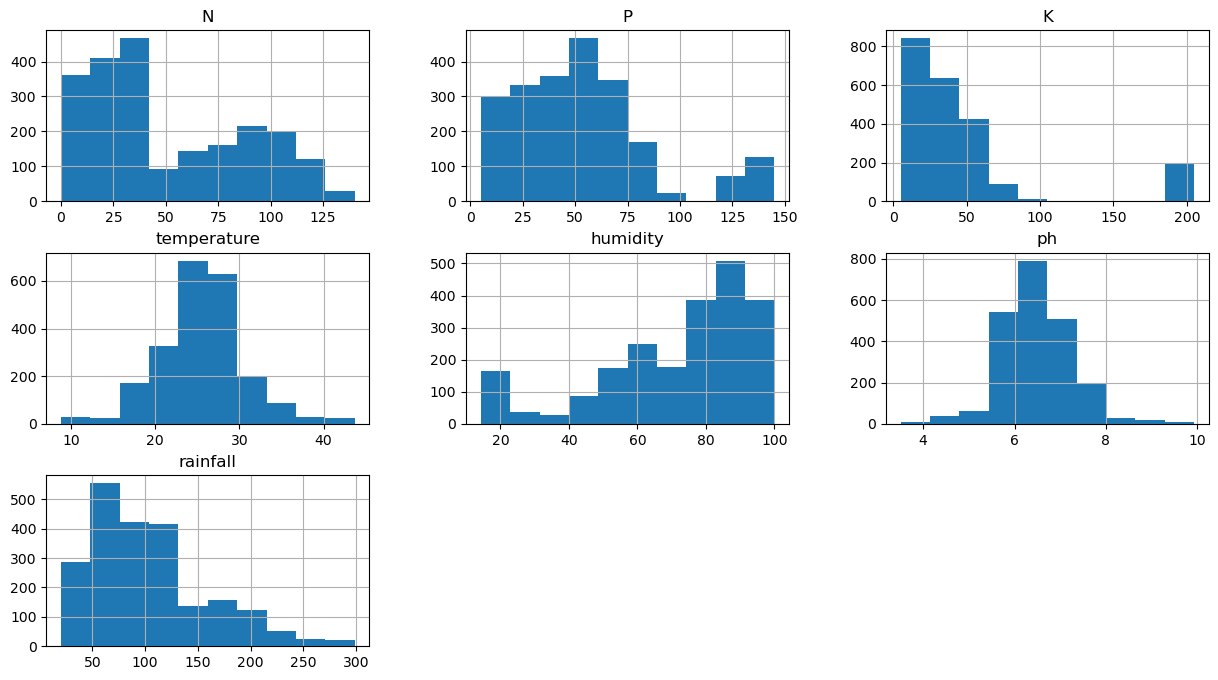

In [8]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,8))

C:\Users\Sanjay\AppData\Local\Temp\ipykernel_9996\3807820682.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


<Axes: >

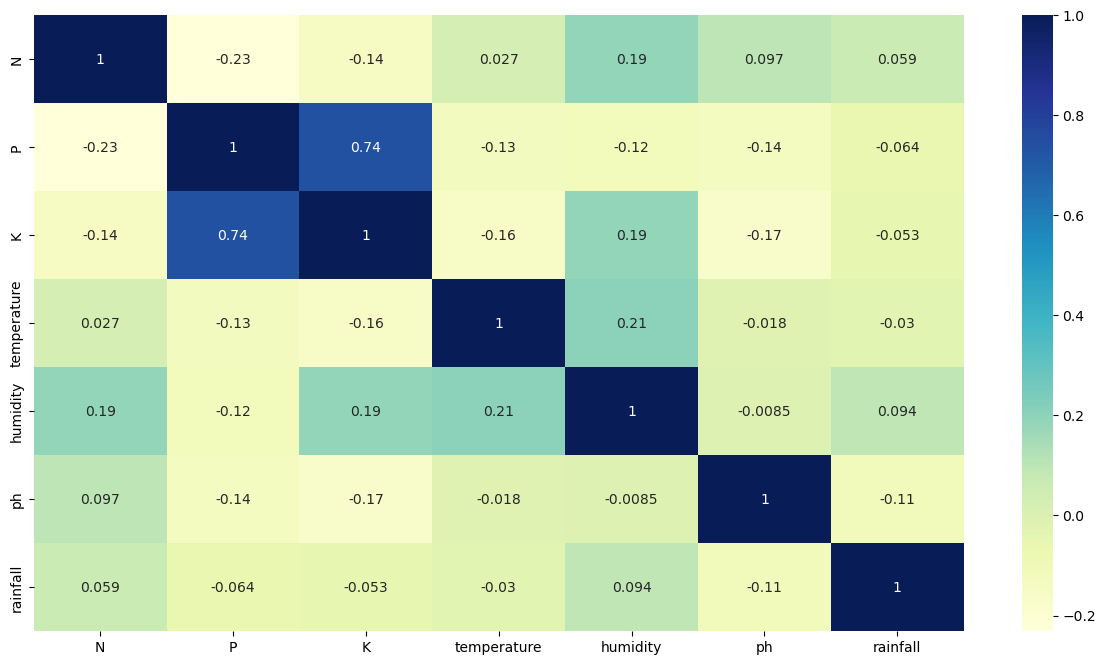

In [9]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(X_train, y_train_encoded)
y_pred=reg.predict(X_test)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_encoded, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_encoded, y_pred)

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(y_test_encoded, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Absolute Error: 4.433454392161999
Mean Squared Error: 31.474262588659087
R-squared: 0.25634813007312396


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train_encoded)

predicted_values = DecisionTree.predict(X_test)
dt_score = metrics.accuracy_score(y_test_encoded, predicted_values)
print("DecisionTrees's Accuracy is: ", dt_score*100)


DecisionTrees's Accuracy is:  86.5909090909091


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameters and their values to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train_encoded)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_decision_tree = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_decision_tree.score(X_test, y_test_encoded)
print("Accuracy of the best model on the test set:", accuracy*100)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy of the best model on the test set: 98.86363636363636


In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

pred = random_forest.predict(X_test)

accuracy_rf = metrics.accuracy_score(y_test, pred)
print("Random Forest Classifier's Accuracy is: ", accuracy_rf * 100)


Random Forest Classifier's Accuracy is:  99.31818181818181


In [16]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(50,200),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,25),
    'min_samples_split':np.arange(2,25),
    'min_samples_leaf':np.arange(2,25)}

rscv_model = RandomizedSearchCV(rf,param_grid, cv=5)
rscv_model.fit(X_train,y_train)
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=8,
                       min_samples_split=13, n_estimators=72)

In [17]:
import pickle
with open('random_forest.pkl','wb')as f:
    pickle.dump(random_forest,f)

In [18]:
import numpy as np
import pickle
samp=np.array([90,42,43,20.87974371,82.00274423,6.502985292,202.9355362]).reshape(1,-1)
with open('random_forest.pkl','rb')as f:
    loaded=pickle.load(f)
prediction_rf=loaded.predict(samp)
print(prediction_rf)

['rice']


C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
new_rf_model = rscv_model.best_estimator_
y_pred = new_rf_model.predict(X_test)
accuracy_new_rf = metrics.accuracy_score(y_test, y_pred)
print(accuracy_new_rf*100)

99.31818181818181


In [20]:
import pickle
with open('optimized.pkl','wb')as f:
    pickle.dump(new_rf_model,f)

In [21]:
import numpy as np
import pickle
samp=np.array([90,42,43,20.87974371,82.00274423,6.502985292,202.9355362]).reshape(1,-1)
with open('optimized.pkl','rb')as f:
    new_loaded=pickle.load(f)
prediction_rf=new_loaded.predict(samp)
print(prediction_rf)

[20]


C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
